<a href="https://colab.research.google.com/github/rugved2003/Machine-learning/blob/main/Titanic_survival_Prediction_usinf_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
titanic_dataset = pd.read_csv('/content/train.csv')

In [91]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic_dataset.shape

(891, 12)

In [93]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
#check th number of missing value in each column
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handing the missing 

In [95]:
titanic_dataset = titanic_dataset.drop(columns='Cabin',axis =1)

In [96]:
print(titanic_dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [97]:
#replacing the missing values in"Age" column with mean value
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace = True)

In [98]:
#fing the mode value of "embarked" column
print(titanic_dataset['Embarked'].mode())

0    S
dtype: object


In [99]:
print(titanic_dataset['Embarked'].mode()[0])

S


In [100]:
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0], inplace = True)

In [101]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data analysis

In [102]:
#getting some statistical measures
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visulization

In [104]:
sns.set()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


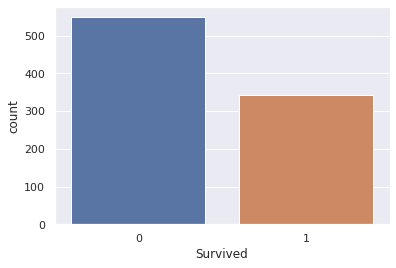

In [105]:
sns.countplot('Survived',data = titanic_dataset)

In [106]:
titanic_dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [107]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [108]:
X = titanic_dataset.drop(columns =['Survived','Name','PassengerId','Ticket'],axis = 1)
Y = titanic_dataset['Survived']

In [121]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [109]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)

In [111]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (801, 7) (90, 7)


In [112]:
print(X_train)
print(Y_train)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
592       3    0  47.000000      0      0    7.2500         0
403       3    0  28.000000      1      0   15.8500         0
218       1    1  32.000000      0      0   76.2917         1
805       3    0  31.000000      0      0    7.7750         0
207       3    0  26.000000      0      0   18.7875         1
..      ...  ...        ...    ...    ...       ...       ...
305       1    0   0.920000      1      2  151.5500         0
265       2    0  36.000000      0      0   10.5000         0
195       1    1  58.000000      0      0  146.5208         1
413       2    0  29.699118      0      0    0.0000         0
464       3    0  29.699118      0      0    8.0500         0

[801 rows x 7 columns]
592    0
403    0
218    1
805    0
207    1
      ..
305    1
265    0
195    1
413    0
464    0
Name: Survived, Length: 801, dtype: int64


In [113]:
model = LogisticRegression()


In [114]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

print(prediction)


In [115]:
#accuracy on traing data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [116]:
print('Accuracy on training data :', training_data_accuracy)

Accuracy on training data : 0.8102372034956304


In [117]:
print(X_train_prediction)

[0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 1 1 1 0 0 

Model Evaluation

In [118]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [119]:
print('Accuracy on training data :', test_data_accuracy)

Accuracy on training data : 0.7555555555555555


Making a predictive System


In [125]:
input_data = (3,0,35.000000,0,0,8.0500,0)
#changing the input data to a numpy array
input_data_as_numpy_array = np.array(input_data)


#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print("passenger is dead")
else:
  print("passenger is survived")



[0]
passenger is dead


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
